# Quantifying Shakespeare

In this notebook we will find the frequencies with which Shakespeare's words used letters.

In [13]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]:
    """Given the name of a file, return a list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower() 
        if line != "":
            lines.append(line)
    return lines

shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))

114840


The next step of our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter. 


In [14]:
# Goal: Define a functon named 'tally'
# Give the function (as params) a dictionary reference (key: str, value: int) and a key
# If the key is in the dictionary, increase value by 1
# Otherwise, set key's value to 1
# It is a procedure and returns None

def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts to increment a key by 1 if it exists, or initalize to 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[str]) -> dict[str, int]:
    """Count frequencies of all letters in a list of strings."""
    counts: dict[str, int] = {}
    # Loop through all lines
    # For each line loop through all characters 
    # Tally character into the counts dictionary
    # Challenge: tally only letters! No numbers or punctuation.
    for line in lines:
        for char in line:
            if char.isalpha():
                tally(counts, char)
    return counts

shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)



{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, 'e': 447204, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, 'a': 289150, 'w': 89390, 'm': 111452, 'k': 35408, 'v': 37569, 'z': 1631, 'q': 3582}


Let's create a visualization of this data with a bar chart.

In [23]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)
sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)

{'a': 289150, 'b': 61956, 'c': 88185, 'd': 149462, 'e': 447204, 'f': 80516, 'g': 68199, 'h': 236868, 'i': 253990, 'j': 4779, 'k': 35408, 'l': 170019, 'm': 111452, 'n': 243262, 'o': 314600, 'p': 58464, 'q': 3582, 'r': 237864, 's': 248989, 't': 329775, 'u': 128947, 'v': 37569, 'w': 89390, 'x': 5294, 'y': 94370, 'z': 1631}


<BarContainer object of 26 artists>

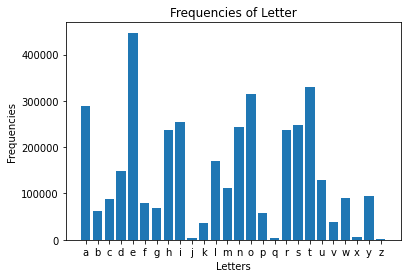

In [24]:
from matplotlib import pyplot


pyplot.title("Frequencies of Letter")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
pyplot.bar(labels, values)